In [21]:
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt


In [ ]:
!pip install pandas numpy scikit-learn statsmodels

# Import des données

In [9]:

participants_train = pd.read_csv(os.path.join("data", "train_participants.csv" ))
participants_train["set"] = 'train'
participants_test = pd.read_csv(os.path.join("data", "test_participants.csv" ))
participants_test["set"] = 'test'
participants = pd.concat([participants_train, participants_test])

In [31]:
rois_train = pd.read_csv(os.path.join("data", "train_rois.csv" ))
rois_train["set"] = 'train'
rois_test = pd.read_csv(os.path.join("data", "test_rois.csv" ))
rois_test["set"] = 'test'
rois = pd.concat([rois_train, rois_test])

In [3]:
test_vbm = np.load("data/test_vbm.npz")


# Exploration 

In [9]:
participants

,participant_id,session,sex,age,diagnosis,study,site,TIV,CSF_Vol,GM_Vol,WM_Vol,set
0,CH7098a,V1,0.0,20.0,schizophrenia,SCHIZCONNECT-VIP,NU,1712.357084,375.529152,747.089338,586.391159,train
1,A00024535,V1,0.0,26.0,control,SCHIZCONNECT-VIP,MRN,1700.601735,399.493745,721.128411,579.446172,train
2,CC7563,V1,1.0,28.0,control,SCHIZCONNECT-VIP,WUSTL,1449.327365,220.825294,661.028439,566.500051,train
3,CC3945,V1,1.0,21.0,control,SCHIZCONNECT-VIP,WUSTL,1184.699000,201.579922,560.051329,423.016129,train
4,CH8853b,V1,1.0,21.0,control,SCHIZCONNECT-VIP,NU,1518.198466,291.544632,705.384606,520.807601,train
...,...,...,...,...,...,...,...,...,...,...,...,...
98,CH8559b,V1,1.0,25.0,control,SCHIZCONNECT-VIP,NU,1398.385380,230.328038,668.801977,498.221794,test
99,A00028404,V1,0.0,23.0,schizophrenia,SCHIZCONNECT-VIP,MRN,1498.177272,312.754730,609.245861,575.301971,test
100,CH7875b,V1,0.0,36.0,schizophrenia,SCHIZCONNECT-VIP,NU,1447.043991,373.211829,584.181460,488.803617,test
101,CC9704,V1,1.0,15.0,control,SCHIZCONNECT-VIP,WUSTL,1218.159369,196.727247,594.455286,426.742181,test


In [14]:
participants.dtypes

participant_id     object
session            object
sex               float64
age               float64
diagnosis          object
study              object
site               object
TIV               float64
CSF_Vol           float64
GM_Vol            float64
WM_Vol            float64
set                object
dtype: object

In [17]:
participants.groupby(["site", "diagnosis"]).count()


participant_id  session  sex  age  study  TIV  CSF_Vol  \
site  diagnosis                                                               
MRN   control                    87       87   87   87     87   87       87   
      schizophrenia              77       77   77   77     77   77       77   
NU    control                    38       38   38   38     38   38       38   
      schizophrenia              42       42   42   42     42   42       42   
WUSTL control                   152      152  152  152    152  152      152   
      schizophrenia             117      117  117  117    117  117      117   

                     GM_Vol  WM_Vol  set  
site  diagnosis                           
MRN   control            87      87   87  
      schizophrenia      77      77   77  
NU    control            38      38   38  
      schizophrenia      42      42   42  
WUSTL control           152     152  152  
      schizophrenia     117     117  117

In [3]:
participants.groupby(["site", "diagnosis"]).count()


participant_id  session  sex  age  study  TIV  CSF_Vol  \
site  diagnosis                                                               
MRN   control                    87       87   87   87     87   87       87   
      schizophrenia              77       77   77   77     77   77       77   
NU    control                    38       38   38   38     38   38       38   
      schizophrenia              42       42   42   42     42   42       42   
WUSTL control                   152      152  152  152    152  152      152   
      schizophrenia             117      117  117  117    117  117      117   

                     GM_Vol  WM_Vol  set  
site  diagnosis                           
MRN   control            87      87   87  
      schizophrenia      77      77   77  
NU    control            38      38   38  
      schizophrenia      42      42   42  
WUSTL control           152     152  152  
      schizophrenia     117     117  117

# Description des variables

In [27]:
participants.columns

Index(['participant_id', 'session', 'sex', 'age', 'diagnosis', 'study', 'site',
       'TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'set'],
      dtype='object')

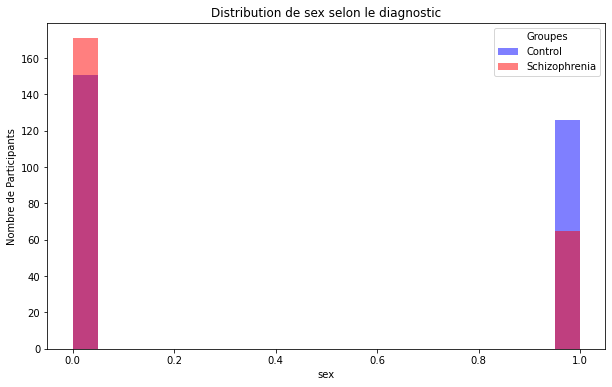

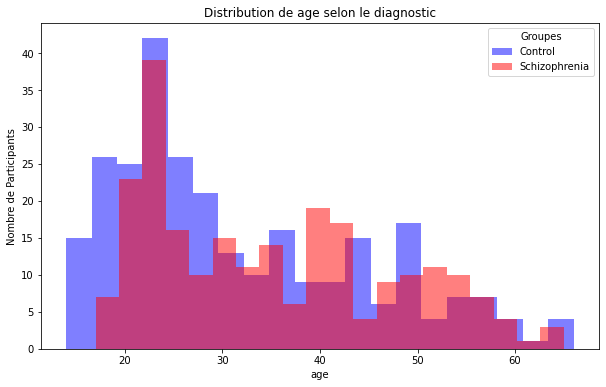

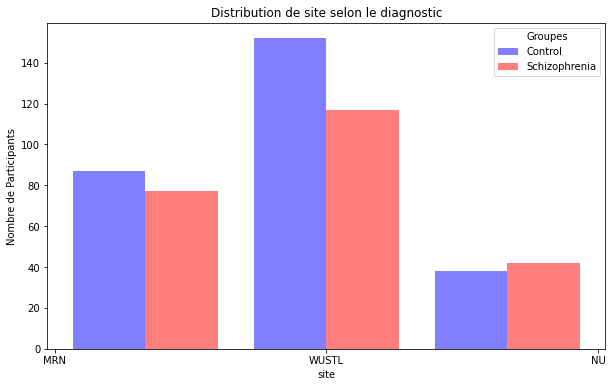

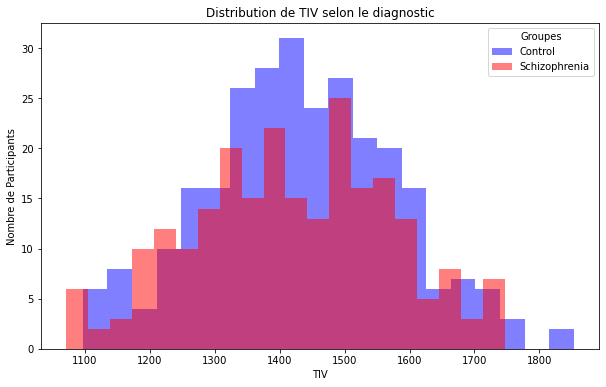

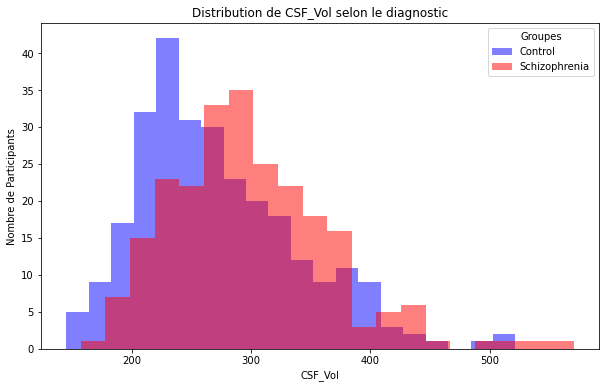

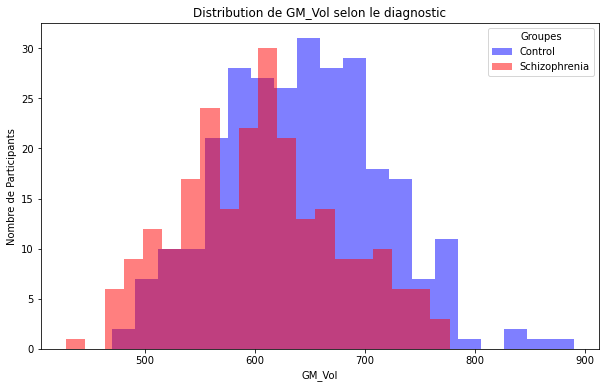

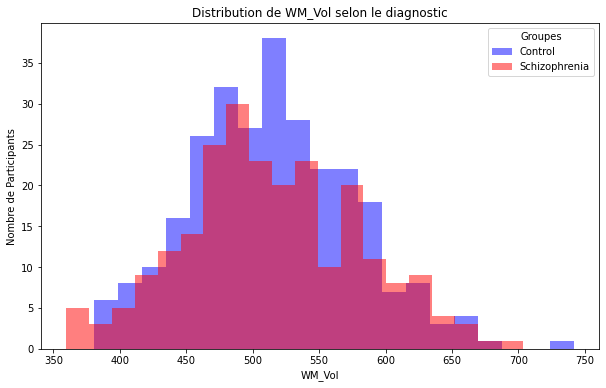

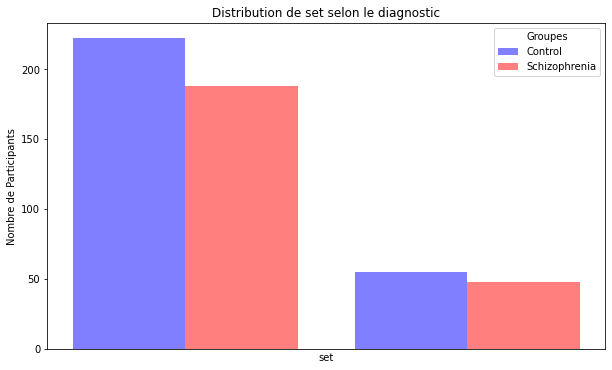

In [30]:
df = participants
# Liste des colonnes d'intérêt
columns_to_plot = [ 'sex', 'age','site', 'TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'set']

# Créer des graphiques pour chaque colonne
for col in columns_to_plot:
    # Si la colonne est catégorielle (par exemple, 'sex', 'session', 'study', 'site', 'set')
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        plt.figure(figsize=(10,6))
        
        # Tracer un bar plot pour les variables catégorielles
        plt.hist([df[df['diagnosis'] == 'control'][col], df[df['diagnosis'] == 'schizophrenia'][col]], 
                 bins=len(df[col].unique()), alpha=0.5, label=['Control', 'Schizophrenia'], color=['blue', 'red'])
        
        # Ajouter des titres et labels
        plt.title(f'Distribution de {col} selon le diagnostic')
        plt.xlabel(col)
        plt.ylabel('Nombre de Participants')
        plt.legend(title='Groupes', loc='upper right')
        plt.show()

    # Si la colonne est numérique (par exemple, 'age', 'TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol')
    elif df[col].dtype in ['int64', 'float64']:
        plt.figure(figsize=(10,6))

        # Tracer des histogrammes pour les variables numériques
        plt.hist(df[df['diagnosis'] == 'control'][col], bins=20, alpha=0.5, label='Control', color='blue')
        plt.hist(df[df['diagnosis'] == 'schizophrenia'][col], bins=20, alpha=0.5, label='Schizophrenia', color='red')
        
        # Ajouter des titres et labels
        plt.title(f'Distribution de {col} selon le diagnostic')
        plt.xlabel(col)
        plt.ylabel('Nombre de Participants')
        plt.legend(title='Groupes', loc='upper right')
        plt.show()

# Traitement de base

1. suprimer variable "session", "study", "participant_id"
2. créer variable adolescent et jeune adulte 
3. Binariser la variable "diagnosis" : 1 si "schizophrenia", 0 sinon
4. Encodage de "site" en variables indicatrices (dummy variables)


In [ ]:

# Supprimer les colonnes "session", "study", "participant_id"
participants_traitee= participants.drop(columns=["session", "study", "participant_id"])

# Créer une nouvelle colonne binaire pour les adolescents et jeunes adultes
participants_traitee["young_adult"] = participants_traitee["age"].apply(lambda x: 1 if x <= 25 and  x >= 18 else 0)
participants_traitee["adolescent"] = participants_traitee["age"].apply(lambda x: 1 if x < 18 and  x >= 10 else 0)

# Binariser la variable "diagnosis" : 1 si "schizophrenia", 0 sinon
participants_traitee["schizophrenia"] = participants_traitee["diagnosis"].apply(lambda x: 1 if x == "schizophrenia" else 0)
participants_traitee= participants_traitee.drop(columns=["diagnosis"])

#Encodage de "site" en variables indicatrices (dummy variables)
participants_traitee = pd.get_dummies(participants_traitee, columns=["site"], drop_first=True)


print(participants_traitee.head())

   sex   age          TIV     CSF_Vol      GM_Vol      WM_Vol    set  \
0  0.0  20.0  1712.357084  375.529152  747.089338  586.391159  train   
1  0.0  26.0  1700.601735  399.493745  721.128411  579.446172  train   
2  1.0  28.0  1449.327365  220.825294  661.028439  566.500051  train   
3  1.0  21.0  1184.699000  201.579922  560.051329  423.016129  train   
4  1.0  21.0  1518.198466  291.544632  705.384606  520.807601  train   

   young_adult  adolescent  schizophrenia  site_NU  site_WUSTL  
0            1           0              1        1           0  
1            0           0              0        0           0  
2            0           0              0        0           1  
3            1           0              0        0           1  
4            1           0              0        1           0  


In [34]:
# Diviser les données en train et test selon la variable "set"
train_data = participants_traitee[participants_traitee["set"] == "train"] 
test_data = participants_traitee[participants_traitee["set"] == "test"]

# Définir les variables explicatives (X) et la cible (y)
X_train = train_data.drop(columns=["schizophrenia", "set"])  # Supprimez la cible et la colonne "set"
y_train = train_data["schizophrenia"]

X_test = test_data.drop(columns=["schizophrenia", "set"])
y_test = test_data["schizophrenia"]


# Modèle Base line

In [66]:
X_train_with_intercept = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_with_intercept)
logit_result = logit_model.fit()
print(logit_result.summary())


Optimization terminated successfully.
         Current function value: 0.562511
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          schizophrenia   No. Observations:                  410
Model:                          Logit   Df Residuals:                      399
Method:                           MLE   Df Model:                           10
Date:                Thu, 19 Dec 2024   Pseudo R-squ.:                  0.1844
Time:                        17:21:53   Log-Likelihood:                -230.63
converged:                       True   LL-Null:                       -282.78
Covariance Type:            nonrobust   LLR p-value:                 7.490e-18
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.9125      1.736      5.134      0.000       5.510      12.315
sex            -1.3171    

In [67]:

# Initialiser et entraîner le modèle
model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, C=0.1)  # L2 est le défaut
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]  

In [62]:
# Afficher les coefficients du modèle
coefficients = model.coef_[0]  
variables = X_train.columns  

coef_df = pd.DataFrame({
    'Variable': variables,
    'Coefficient': coefficients
})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

print(coef_df)


      Variable  Coefficient  Abs_Coefficient
0          sex    -0.707220         0.707220
8      site_NU     0.359698         0.359698
9   site_WUSTL     0.328814         0.328814
7   adolescent    -0.326312         0.326312
6  young_adult     0.291403         0.291403
4       GM_Vol    -0.076551         0.076551
2          TIV     0.056210         0.056210
3      CSF_Vol    -0.052040         0.052040
1          age    -0.046650         0.046650
5       WM_Vol    -0.045761         0.045761


In [63]:
# Métriques
rmse = np.sqrt(mean_squared_error(y_test, y_pred_proba))
print(f"RMSE : {rmse:.4f}")

precision = precision_score(y_test, model.predict(X_test))
print(f"Precision : {precision:.4f}")


recall = recall_score(y_test, model.predict(X_test))
print(f"Recall : {recall:.4f}")

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC : {auc:.4f}")



RMSE : 0.4539
Precision : 0.7381
Recall : 0.6458
AUC : 0.7413
